# Data

In [2]:
import pandas as pd
import requests
import numpy as np

tsla_dataset = "https://raw.githubusercontent.com/parzivalsupreme/TESLA-Stock-Data/main/TSLA.csv"
df = pd.read_csv(tsla_dataset)

In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace = True)

## Data Structure

In [4]:
tsla = df
tsla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500


In [5]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 184.8+ KB


In [6]:
tsla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


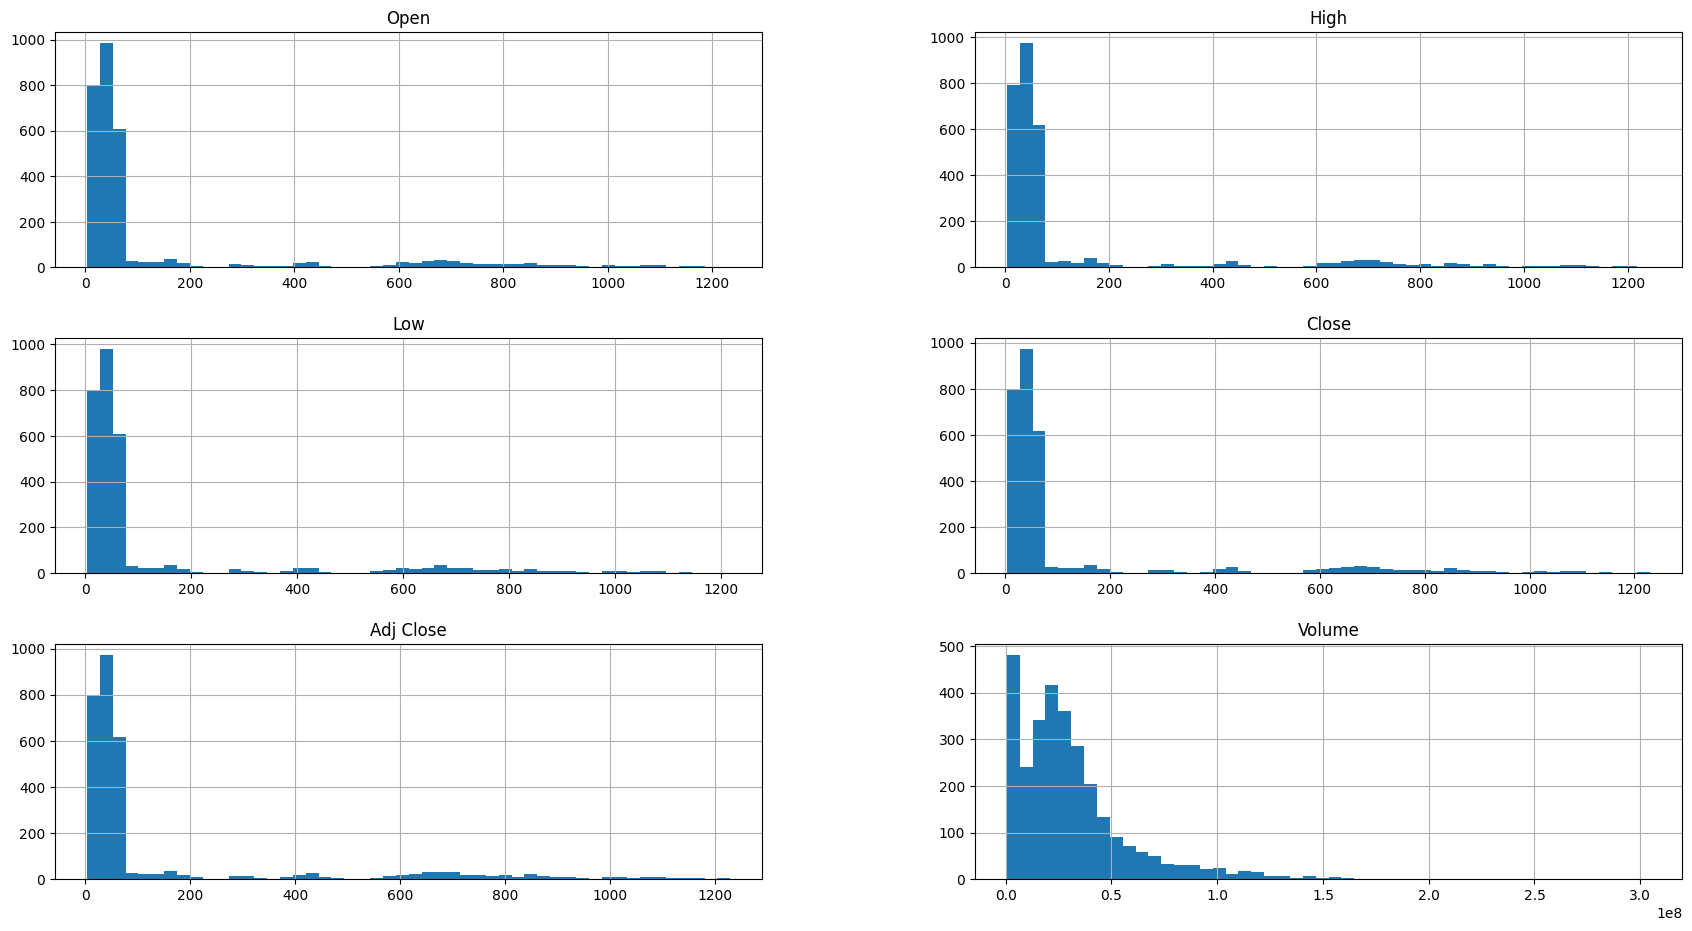

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
tsla.hist(bins=50, figsize=(21,11))
plt.show()

# Visualize the Data

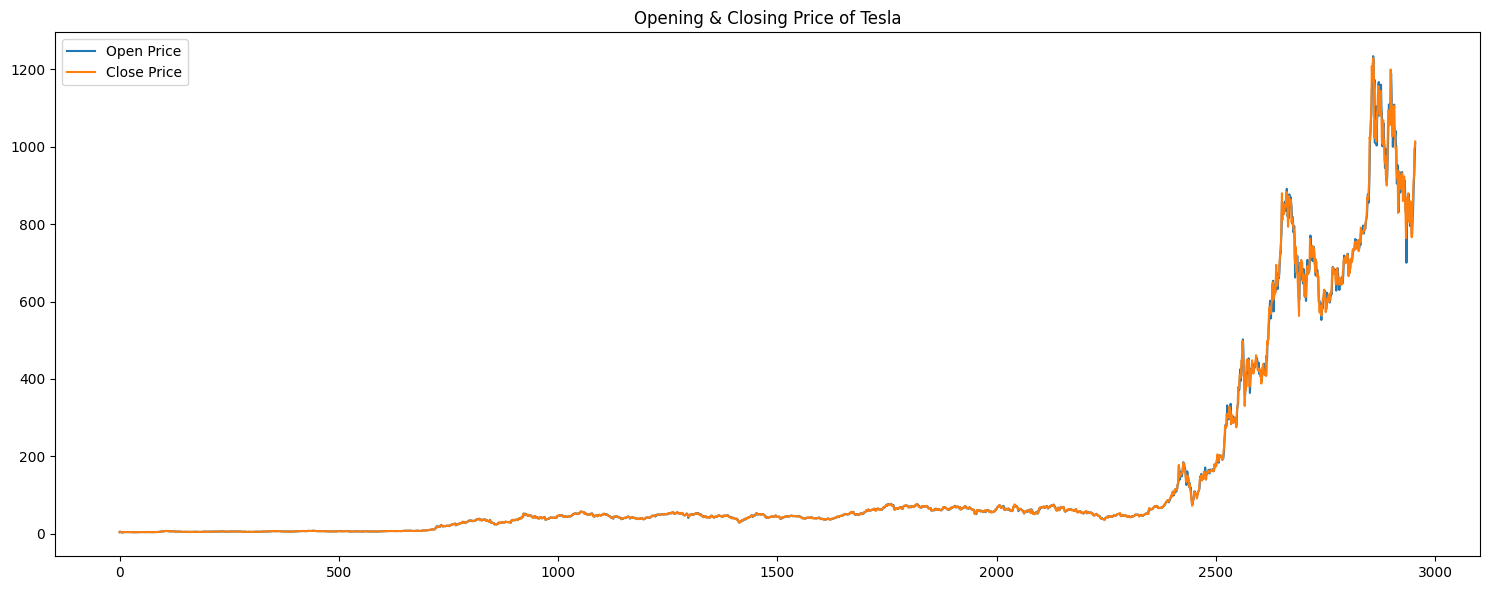

In [8]:
plt.figure(figsize=(15,6))
tsla['Open'].plot()
tsla['Close'].plot()
plt.title('Opening & Closing Price of Tesla')
plt.legend(['Open Price','Close Price'])
plt.tight_layout()
plt.show()

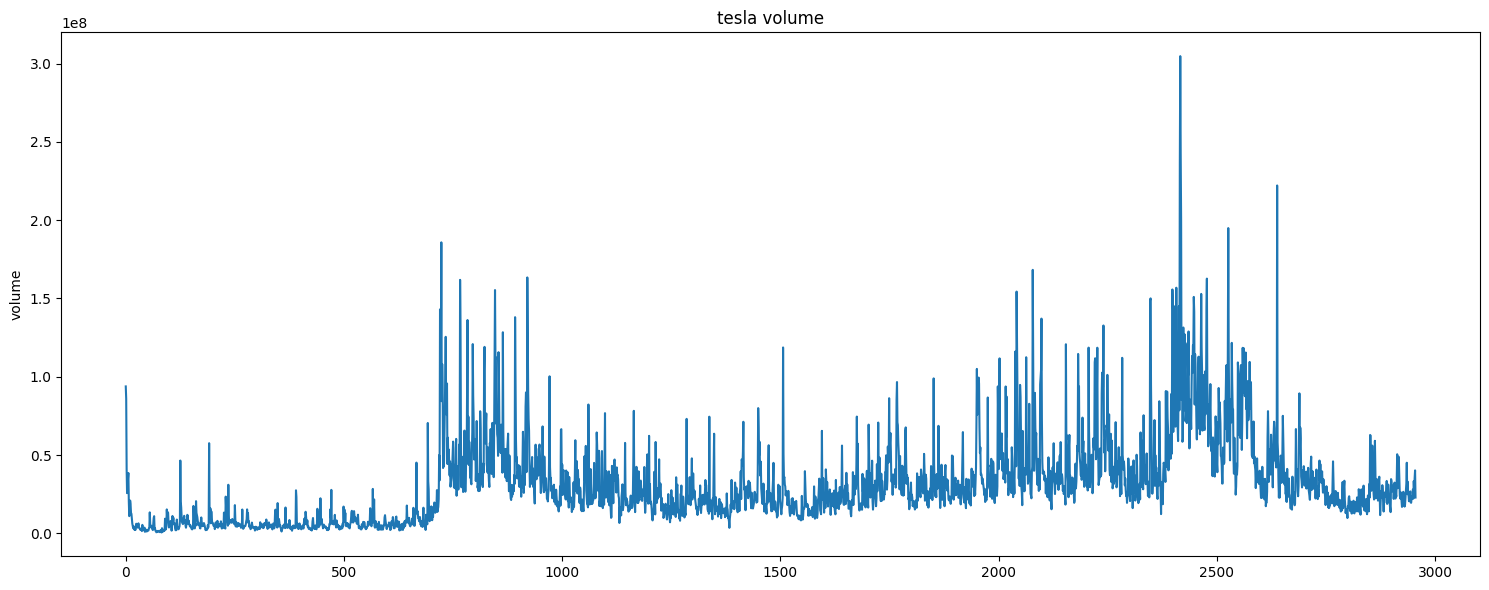

In [9]:
plt.figure(figsize=(15,6))
tsla['Volume'].plot()
plt.ylabel('volume')
plt.title('tesla volume')
plt.tight_layout()
plt.show()

# Train Test Split

In [10]:
tsla.dropna(inplace=True)
tsla.drop_duplicates(inplace = True)

In [11]:
from sklearn.model_selection import train_test_split

X = tsla[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = tsla['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(len(X_train)+len(y_train))

4728


In [13]:
print(len(X_test)+len(y_test))

1184


In [14]:
X_test.head()

,Open,High,Low,Adj Close,Volume
1956,60.200001,61.855999,59.099998,59.860001,67601500
2309,45.830002,46.487999,44.841999,45.122002,46603000
930,47.299999,48.919998,46.486000,46.882000,44050500
1213,44.099998,44.160000,43.602001,43.686001,12139000
2090,53.139999,55.476002,52.448002,55.318001,47632000


In [15]:
y_test.head()

1956    59.860001
2309    45.122002
930     46.882000
1213    43.686001
2090    55.318001
Name: Close, dtype: float64

In [16]:
X.head(10)

,Open,High,Low,Adj Close,Volume
0,3.800,5.000,3.508,4.778,93831500
1,5.158,6.084,4.660,4.766,85935500
2,5.000,5.184,4.054,4.392,41094000
3,4.600,4.620,3.742,3.840,25699000
4,4.000,4.000,3.166,3.222,34334500
5,3.280,3.326,2.996,3.160,34608500
6,3.228,3.504,3.114,3.492,38557000
7,3.516,3.580,3.310,3.480,20253000
8,3.590,3.614,3.400,3.410,11012500
9,3.478,3.728,3.380,3.628,13400500


# Model Training

In [17]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluation

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = forest_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1.477782546505252

# Fine-Tune

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)